#Checkerboard Microstructure

##Introduction - What are 2-Point Spatial Correlations (also called 2-Point Statistics)?

The purpose of this example is to introduce 2-point spatial correlations and how they are computed using PyMKS.

The example starts with some introductory information about spatial correlations. PyMKS is used to compute both the periodic and non-periodic 2-point spatial correlations (also referred to as 2-point statistics or autocorrelations and crosscorrelations) for a checkerboard microstructure. This is a relatively simple example that allows an easy discussion of how the spatial correlations capture the main features seen in the original microstructure.

## n-Point Spatial Correlations

###1-Point Spatial Correlations (or 1-point statistics)

n-point spatial correlations provide a way rigorously quantify material structure using statistics. As an introduction n-point spatial correlations, let's first discuss 1-point statistics. 1-point statistics are the probability that a specified local state  will be found in any randomly selected spatial bin in a microstructure [1][2][3]. In this checkerboard example discussed here, there are two possible local states, one is colored white and the other is colored black. 1-point statistics compute the volume fractions of the local states in the microstructure. 1-point statistics are computed as

$$ f[l] = \frac{1}{S} \sum_s m[s,l] $$

In this equation, $f[l]$ is the probability of finding the local state $l$ in any randomly selected spatial bin in the microstructure, $m[s, l]$ is the microstructure function (the digital representation of the microstructure), $S$ is the total number of spatial bins in the microstructure and $s$ refers to a specific spatial bin. 

While 1-point statistics provide information on the relative amounts of the different local states, it does not provide any information about how those local states are spatially arranged in the microstructure. Therefore, 1-point statistics are a limited set of metrics to describe the structure of materials.

###2-Point Spatial Correlations

2-point spatial correlations (also known as 2-point statistics) contain information about the fractions of local states as well as the first order information on how the different local states are distributed in the microstructure. 

2-point statistics can be thought of as the probability of having a vector placed randomly in the microstructure and having one end of the vector be on one specified local state and the other end on another specified local state. This vector could have any length or orientation that the discrete microstructure allows. The equation for 2-point statistics can found below.

$$ f[r \vert l, l'] = \frac{1}{S} \sum_s m[s, l] m[s + r, l'] $$

In this equation $ f[r \vert l, l']$ is the conditional probability of finding the local states $l$ and $l'$ at a distance and orientation away from each other defined by the vector $r$. All other variables are the same as those in the 1-point statistics equation. In the case that we have an eigen microstructure function (it only contains values of 0 or 1) and we are using an indicator basis, the the $r=0$ vector will recover the 1-point statistics. 

When the 2 local states are the same $l = l'$, it is referred to as a autocorrelation. If the 2 local states are not the same it is referred to as a crosscorrelation. 

###Higher Order Spatial Statistics

Higher order spatial statistics are similar to 2-point statistics, in that they can be thought of in terms of conditional probabilities of finding specified local states separated by a prescribed set of vectors. 3-point statistics are the probability of finding three specified local states at the ends of a triangle (defined by 2 vectors) placed randomly in the material structure. 4-point statistics describes the probability of finding 4 local states at 4 locations (defined using 3 vectors) and so on. 

While higher order statistics are a better metric to quantify the material structure, the 2-point statistics can be computed much faster than higher order spatial statistics, and still provide information about how the local states are distributed. For this reason, only 2-point statistics are implemented into PyMKS. Let us look at an example of computing the 2-point statistics for a checkerboard microstructure.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

##2-Point Statistics for Checkerboard Microstructure

Let's first start with making a microstructure that looks like a 8 x 8 checkerboard. Although this type of microstructure may not resemble a physical system, it provides solutions that give some intuitive understanding of 2-point statistics.

We can create a checkerboard microstructure using `make_checkerboard_microstructure` function from `pymks.datasets`.

In [2]:
from pymks.datasets import make_checkerboard_microstructure

X = make_checkerboard_microstructure(square_size=21, n_squares=8)

Now let's take a look at how the microstructure looks.

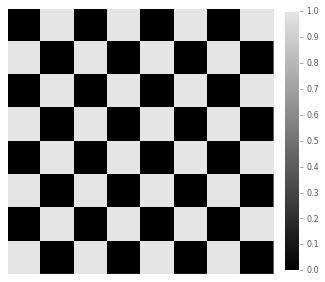

(1, 168, 168)


In [3]:
from pymks.tools import draw_microstructures

draw_microstructures(X)

print X.shape

##Compute Periodic 2-Point Statistics

Now that we have created a microstructure to work with, we can start computing the 2-point statistics. Let's start by looking at the periodic autocorrelations of the microstructure and then compute the periodic crosscorrelation. This can be done using the `autocorrelate` and `crosscorrelate` functions from `pymks.states`, and using the keyword argument `periodic_axes` to specify the axes that are periodic. 

In order to compute 2-pont statistics, we need to select a basis to generate the microstructure function `X_` from the microstructure `X`. Because we only have values of 0 or 1 in our microstructure we will using the `DiscreteIndicatorBasis` with `n_states` equal to 2.

In [4]:
from pymks.stats import autocorrelate
from pymks import DiscreteIndicatorBasis

discrete_basis = DiscreteIndicatorBasis(n_states=2)
X_ = discrete_basis.discretize(X)
X_auto = autocorrelate(X_, periodic_axes=(0, 1))

We have now computed the autocorrelations.

Let's take a look at them using `draw_autocorrelations` from `pymks.tools`.

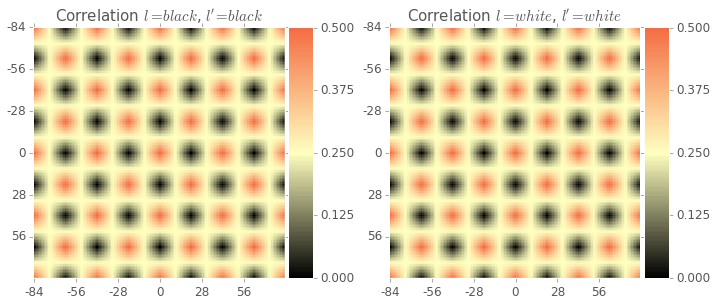

In [5]:
from pymks.tools import draw_autocorrelations

correlations = [('black', 'black'), ('white', 'white')]
draw_autocorrelations(X_auto[0], autocorrelations=correlations)

Notice that for this checkerboard microstructure, the autocorrelation for these 2 local states in the exact same. We have just computed the periodic autocorrelations for a perfectly periodic microstructure with equal volume fractions. In general this is not the case and the autocorrelations will be different as we will see later in this example.

As mentioned in the introduction, because we using an indicator basis and the we have eigen-microstructure functions (values are either 0 or 1), the (0, 0) vector equals the volume fraction. 

Let's double check that both the phases have a volume fraction of 0.5.

In [6]:
center = (X_auto.shape[1] + 1) / 2
print 'Volume fraction of black phase', X_auto[0, center, center, 0]
print 'Volume fraction of white phase', X_auto[0, center, center, 1]

Volume fraction of black phase 0.500000006869
Volume fraction of white phase 0.500000006869


We can compute the cross-correlation of the microstructure function using the `crosscorrelate` function from `pymks.stats`

In [7]:
from pymks.stats import crosscorrelate

X_cross = crosscorrelate(X_, periodic_axes=(0, 1))

Let's take a look at the cross correlation using `draw_crosscorrelations` from `pymks.tools`.

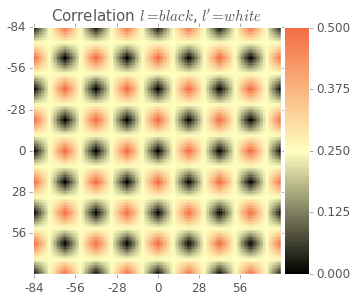

In [8]:
from pymks.tools import draw_crosscorrelations

correlations = [('black', 'white')]
draw_crosscorrelations(X_cross[0], crosscorrelations=correlations)

Notice that the crosscorrelation is the exact opposite of the 2 autocorrelations. The (0, 0) vector has a value of 0. This statistic reflects the probablity of 2 phases having the same location. In our microstructure, this probability is zero as we have not allowed the two phases (colored black and white) to co-exist in the same spatial voxel.

Let check that it is zero.

In [9]:
print 'Center value', X_cross[0, center, center, 0]

Center value 7.48243552237e-17


##Compute Non-Periodic 2-Point Statistics

We will now compute the non-periodic 2-point statistics for our microstructure. This time rather than using the `autocorrelate` and `crosscorrelate` functions, we will use the `correlate` function from `pymks.stats`. The `correlate` function computes all of the autocorrelations and crosscorrelations at the same time. We will computed the non-periodic statistics by omitting the keyword argument `periodic_axes`.

In [10]:
from pymks.stats import correlate

X_corr = correlate(X_)

All or some of the correlations can be viewed using the `draw_correlations` function from `pymks.tools`. In this example we will look at all of them.

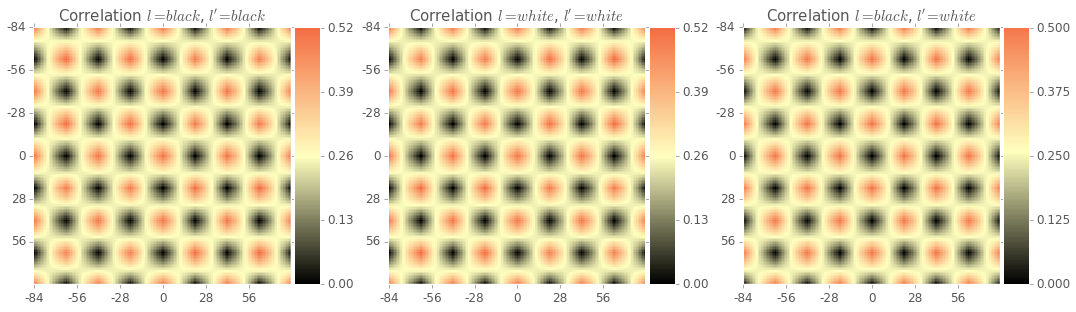

In [11]:
from pymks.tools import draw_correlations

correlations = [('black', 'black'), ('white', 'white'), ('black', 'white')]
draw_correlations(X_corr[0].real, correlations=correlations)

Notice that the maximum values for the autocorrelations are higher than 0.5. We can still show that the centers or the (0, 0) vectors are still equal to the volume fractions.

In [12]:
print 'Volume fraction of black phase', X_corr[0, center, center, 0]
print 'Volume fraction of white phase', X_corr[0, center, center, 1]

Volume fraction of black phase 0.5
Volume fraction of white phase 0.5


The non-periodic statistics are different from the periodic 2-point statistics along the diagonal vectors, but in both cases the probability of (0, 0) vector is still the volume fraction.

## References

[1] S.R. Niezgoda, D.T. Fullwood, S.R. Kalidindi, Delineation of the Space of 2-Point Correlations in a Composite Material System, Acta Materialia, 56, 18, 2008, 5285–5292 [doi:10.1016/j.actamat.2008.07.005](http://dx.doi.org/10.1016/j.actamat.2008.07.005)

 
[2] S.R. Niezgoda, D.M. Turner, D.T. Fullwood, S.R. Kalidindi, Optimized Structure Based Representative Volume Element Sets Reflecting the Ensemble-Averaged 2-Point Statistics, 58, 13, 2010, 4432–4445  [doi:10.1016/j.actamat.2010.04.041](http://dx.doi.org/10.1016/j.actamat.2010.04.041)


[3] D.T. Fullwood, S.R. Kalidindi, and B.L. Adams, Second - Order Microstructure Sensitive Design Using 2-Point Spatial  Correlations, Chapter 12 in Electron Backscatter Diffraction in Materials Science , 2nd Edition , Eds. A. Schwartz, M. Kumar, B. Adams, D. Field, Springer, NY, 2009. 